In [1]:
import os
import cv2
from glob import glob
import matplotlib.pyplot as plt


In [2]:
face_cascade = cv2.CascadeClassifier('src/features/haarcascades/haarcascade_frontalface_default.xml')

def ROI(img):
    offset = 30 
    face_img = img.copy()
    face_rects = face_cascade.detectMultiScale(face_img,scaleFactor=1.3, minNeighbors=5) 
    for (x,y,w,h) in face_rects: 
        roi = face_img[y-offset:y+h+offset,x-offset:x+w+offset] 
    return roi

def save_faces(arquivo_video):
    cap = cv2.VideoCapture(arquivo_video)
    ret,frame = cap.read()
    count = 0
    #try:
    while count < 10:
        cap.set(cv2.CAP_PROP_POS_MSEC,(count*1000))   
        ret,frame = cap.read()
        image0 = frame
        image0 = ROI(frame)
        arquivo = arquivo_video.replace("data/external/","").replace(".mp4","")
        arquivo_nome = "data/interim/faces/"+ arquivo + "_" + str(count) + ".jpg"
        cv2.imwrite(arquivo_nome,image0)
        count = count + 1
        print(count)
        print(arquivo)
        print(arquivo_nome)
    #except:
    #    pass

In [40]:
arquivo_video = glob('data/external/*.mp4')[0]
save_faces(arquivo_video)

1
fake_id0_id2_0007
data/interim/faces/fake_id0_id2_0007_0.jpg
2
fake_id0_id2_0007
data/interim/faces/fake_id0_id2_0007_1.jpg
3
fake_id0_id2_0007
data/interim/faces/fake_id0_id2_0007_2.jpg
4
fake_id0_id2_0007
data/interim/faces/fake_id0_id2_0007_3.jpg
5
fake_id0_id2_0007
data/interim/faces/fake_id0_id2_0007_4.jpg
6
fake_id0_id2_0007
data/interim/faces/fake_id0_id2_0007_5.jpg
7
fake_id0_id2_0007
data/interim/faces/fake_id0_id2_0007_6.jpg
8
fake_id0_id2_0007
data/interim/faces/fake_id0_id2_0007_7.jpg
9
fake_id0_id2_0007
data/interim/faces/fake_id0_id2_0007_8.jpg
10
fake_id0_id2_0007
data/interim/faces/fake_id0_id2_0007_9.jpg


In [41]:
cap = cv2.VideoCapture(arquivo_video)
ret,frame = cap.read()
count = 0

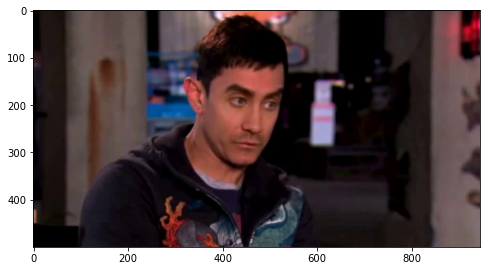

In [42]:
def display_img(img):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax.imshow(img)

display_img(frame)

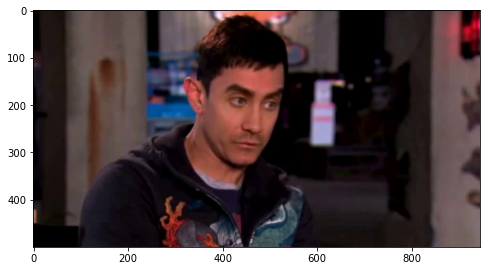

In [43]:
cap.set(cv2.CAP_PROP_POS_MSEC,(count*1000))   
ret,frame = cap.read()
image0 = frame
display_img(image0)

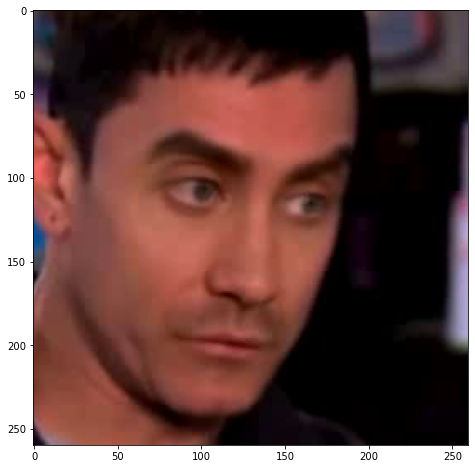

In [44]:
display_img(ROI(image0))

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout, Reshape, Concatenate, LeakyReLU
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score

# Tamanho a imagem e canais
image_dimensions = {'height':256, 'width':256, 'channels':3}

# Classe do classificador
class Classifier:
    def __init__():
        self.model = 0 
    def predict(self, x):
        return self.model.predict(x)  
    def fit(self, x, y):
        return self.model.train_on_batch(x, y)
    def get_accuracy(self, x, y):
        return self.model.test_on_batch(x, y)
    def load(self, path):
        self.model.load_weights(path)

# Rede Mesonet usando o Classificador
class Meso4(Classifier):
    def __init__(self, learning_rate = 0.001):
        self.model = self.init_model()
        optimizer = Adam(lr = learning_rate)
        self.model.compile(optimizer = optimizer,
                           loss = 'mean_squared_error',
                           metrics = ['accuracy'])
    
    def init_model(self): 
        x = Input(shape = (image_dimensions['height'],
                           image_dimensions['width'],
                           image_dimensions['channels']))
        
        x1 = Conv2D(8, (3, 3), padding='same', activation = 'relu')(x)
        x1 = BatchNormalization()(x1)
        x1 = MaxPooling2D(pool_size=(2, 2), padding='same')(x1)
        
        x2 = Conv2D(8, (5, 5), padding='same', activation = 'relu')(x1)
        x2 = BatchNormalization()(x2)
        x2 = MaxPooling2D(pool_size=(2, 2), padding='same')(x2)
        
        x3 = Conv2D(16, (5, 5), padding='same', activation = 'relu')(x2)
        x3 = BatchNormalization()(x3)
        x3 = MaxPooling2D(pool_size=(2, 2), padding='same')(x3)
        
        x4 = Conv2D(16, (5, 5), padding='same', activation = 'relu')(x3)
        x4 = BatchNormalization()(x4)
        x4 = MaxPooling2D(pool_size=(4, 4), padding='same')(x4)
        
        y = Flatten()(x4)
        y = Dropout(0.5)(y)
        y = Dense(16)(y)
        y = LeakyReLU(alpha=0.1)(y)
        y = Dropout(0.5)(y)
        y = Dense(1, activation = 'sigmoid')(y)

        return Model(inputs = x, outputs = y)
    
# Utilização de pesos já treinados
meso = Meso4()
meso.load('src/models/Meso4_DF.h5')

/Users/diegoabreu/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [47]:
# Preparação da imagem

# Rescaling pixel values (between 1 and 255) to a range between 0 and 1
dataGenerator = ImageDataGenerator(rescale=1./255)
directory = 'data/interim/'
# Instantiating generator to feed images through the network

generator = dataGenerator.flow_from_directory(
    directory,
    target_size=(256, 256),
    class_mode=None,
    batch_size=1,
    shuffle=False
)


Found 10 images belonging to 1 classes.


In [48]:
frame = []
real = []
fake = []
for i in range(10):
    X = generator.next()
    pred = meso.predict(X)[0][0]
    frame.append(i)
    real.append(pred)
    fake.append(1-pred)
resultado_real = sum(real)/len(real)
display(resultado_real)
resultado_fake = 1 - resultado_real
display(resultado_fake)

    

0.3628635972738266

0.6371364027261734

In [11]:
(0.98144674 + 0.9986396+0.9954721+0.9973723 +0.9932517+0.99831694 + 0.9971266+0.9976499+0.9903793 +0.9980978)/10

0.9947752979999999

In [12]:
sum(real)

9.947752892971039

In [13]:
len(real)

10

In [ ]:
import imageio
frames_gif = []
for t in glob('../data/interim/faces/*jpg'):
    image = imageio.imread(t)
    frames_gif.append(image)

imageio.mimsave('../data/interim/example.gif',frames_gif,duration = 5)

In [15]:
import cv2
import numpy as np
import os
import glob
from matplotlib import pyplot as plt
import pickle
from scipy.interpolate import griddata
import pandas as pd
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score

In [16]:
# from https://www.astrobetter.com/blog/2010/03/03/fourier-transforms-of-images-in-python/

def azimuthalAverage(image, center=None):
    """
    Calculate the azimuthally averaged radial profile.

    image - The 2D image
    center - The [x,y] pixel coordinates used as the center. The default is 
             None, which then uses the center of the image (including 
             fracitonal pixels).
    
    """
    # Calculate the indices from the image
    y, x = np.indices(image.shape)

    if not center:
        center = np.array([(x.max()-x.min())/2.0, (y.max()-y.min())/2.0])

    r = np.hypot(x - center[0], y - center[1])

    # Get sorted radii
    ind = np.argsort(r.flat)
    r_sorted = r.flat[ind]
    i_sorted = image.flat[ind]

    # Get the integer part of the radii (bin size = 1)
    r_int = r_sorted.astype(int)

    # Find all pixels that fall within each radial bin.
    deltar = r_int[1:] - r_int[:-1]  # Assumes all radii represented
    rind = np.where(deltar)[0]       # location of changed radius
    nr = rind[1:] - rind[:-1]        # number of radius bin
    
    # Cumulative sum to figure out sums for each radius bin
    csim = np.cumsum(i_sorted, dtype=float)
    tbin = csim[rind[1:]] - csim[rind[:-1]]

    radial_prof = tbin / nr

    return radial_prof

In [17]:
from glob import glob
glob('data/interim/faces/*jpg')

['data/interim/faces/real_ahesnzswur_0.jpg',
 'data/interim/faces/real_ahesnzswur_1.jpg',
 'data/interim/faces/real_ahesnzswur_2.jpg',
 'data/interim/faces/real_ahesnzswur_3.jpg',
 'data/interim/faces/real_ahesnzswur_4.jpg',
 'data/interim/faces/real_ahesnzswur_5.jpg',
 'data/interim/faces/real_ahesnzswur_6.jpg',
 'data/interim/faces/real_ahesnzswur_7.jpg',
 'data/interim/faces/real_ahesnzswur_8.jpg',
 'data/interim/faces/real_ahesnzswur_9.jpg']

In [73]:
def modelo_analise_de_espectro():
    epsilon = 1e-8
    N = 300
    number_iter = 10
    psd1D_total = np.zeros([number_iter, N])
    label_total = np.zeros([number_iter])
    cont = 0
    real = []
    fake = []
    for face in glob('data/interim/faces/*jpg'):
        img = cv2.imread(face,0)
        f = np.fft.fft2(img)
        fshift = np.fft.fftshift(f)
        fshift += epsilon
        magnitude_spectrum = 20*np.log(np.abs(fshift))
        psd1D = azimuthalAverage(magnitude_spectrum)
        # Calculate the azimuthally averaged 1D power spectrum
        points = np.linspace(0,N,num=psd1D.size) # coordinates of a
        xi = np.linspace(0,N,num=N) # coordinates for interpolation
        interpolated = griddata(points,psd1D,xi,method='cubic')
        interpolated /= interpolated[0]
        psd1D_total[cont,:] = interpolated             
        label_total[cont] = 1
        cont+=1     
    pred = modelo.predict(psd1D_total)
    real = list(pred)
    fake = list(1-pred)
    resultado_real = sum(real)/len(real)
    resultado_fake = 1 - resultado_real
    return (real,fake,resultado_real,resultado_fake)


In [74]:
modelo_analise_de_espectro()

([1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0],
 [0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0],
 0.8,
 0.19999999999999996)

In [82]:
modelo1 = modelo_analise_de_espectro()
modelo2 = modelo_analise_de_espectro()

In [87]:
peso1 = 0.616
peso2 = 0.707
peso_total = peso1+peso2
real_modelo1 =[]
real_modelo2 =[]
fake_modelo1 =[]
fake_modelo2 =[]
real = []
fake = []
for i in modelo1[1]: real_modelo1.append(i*peso1)
for i in modelo2[0]: real_modelo2.append(i*peso2)
for i in modelo1[2]: fake_modelo1.append(i*peso1)
for i in modelo2[1]: fake_modelo2.append(i*peso2)
for i in [x + y for x, y in zip(real_modelo1, real_modelo2)]: real.append(i/peso_total)
for i in [x + y for x, y in zip(fake_modelo1, fake_modelo2)]: fake.append(i/peso_total)
resultado_real = sum(real)/len(real)
resultado_fake = 1 - resultado_real


In [88]:
real

[0.5343915343915344,
 0.5343915343915344,
 0.46560846560846564,
 0.5343915343915344,
 0.5343915343915344,
 0.46560846560846564,
 0.5343915343915344,
 0.5343915343915344,
 0.5343915343915344,
 0.5343915343915344]

In [19]:
# Importação do Modelo:
modelo = pickle.load(open('src/models/model_espectro.pkl','rb'))

In [56]:
data= {}
epsilon = 1e-8
N = 300
number_iter = 10
psd1D_total = np.zeros([number_iter, N])
cont = 0


#fake data
for filename in glob('data/interim/faces/*jpg'):
    img = cv2.imread(filename,0)
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    fshift += epsilon
    magnitude_spectrum = 20*np.log(np.abs(fshift))
    psd1D = azimuthalAverage(magnitude_spectrum)
    # Calculate the azimuthally averaged 1D power spectrum
    points = np.linspace(0,N,num=psd1D.size) # coordinates of a
    xi = np.linspace(0,N,num=N) # coordinates for interpolation
    interpolated = griddata(points,psd1D,xi,method='cubic')
    interpolated /= interpolated[0]
    psd1D_total[cont,:] = interpolated    
    cont+=1         
    if cont == number_iter:
        break


In [57]:
teste = modelo.predict(psd1D_total)
print(teste.sum())

8.0


In [46]:
teste

array([1., 1., 0., 1., 1., 0., 1., 1., 1., 1.])